              Sales
Date               
2021-01-01  5399.01
2021-02-01  5477.25
2021-03-01  5865.74
2021-04-01  6147.06
2021-05-01  5522.61


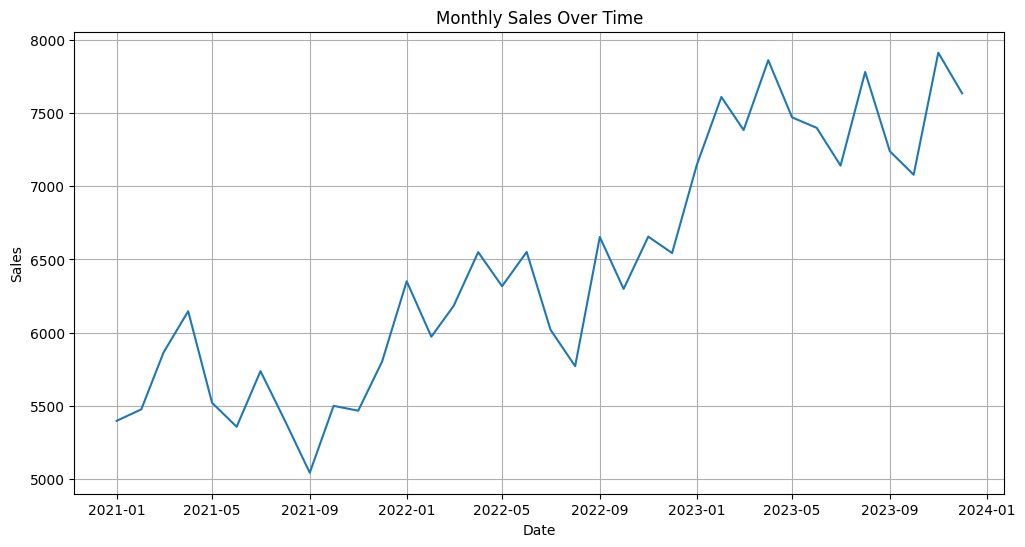

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Time_Series_Sales.csv', parse_dates=['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# Display first rows
print(df.head())

# Plot sales over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'])
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


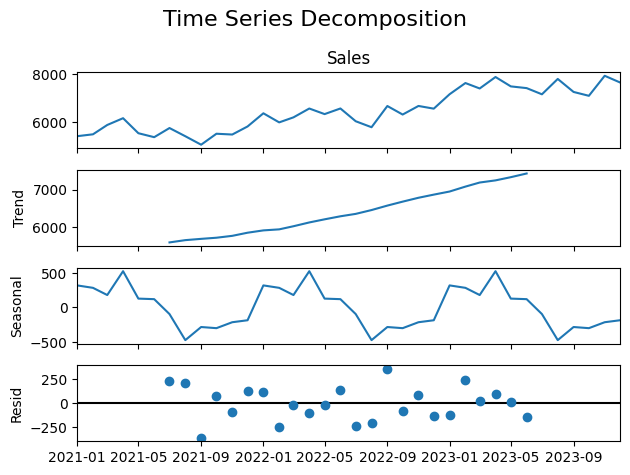

In [2]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose into trend, seasonality, residual
result = seasonal_decompose(df['Sales'], model='additive', period=12)

# Plot decomposition
result.plot()
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -63.312
Date:                            Wed, 25 Jun 2025   AIC                            136.624
Time:                                    09:35:07   BIC                            137.610
Sample:                                01-01-2021   HQIC                           134.496
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4453      0.641     -0.695      0.487      -1.701       0.811
ma.L1         -1.0000    133.759   

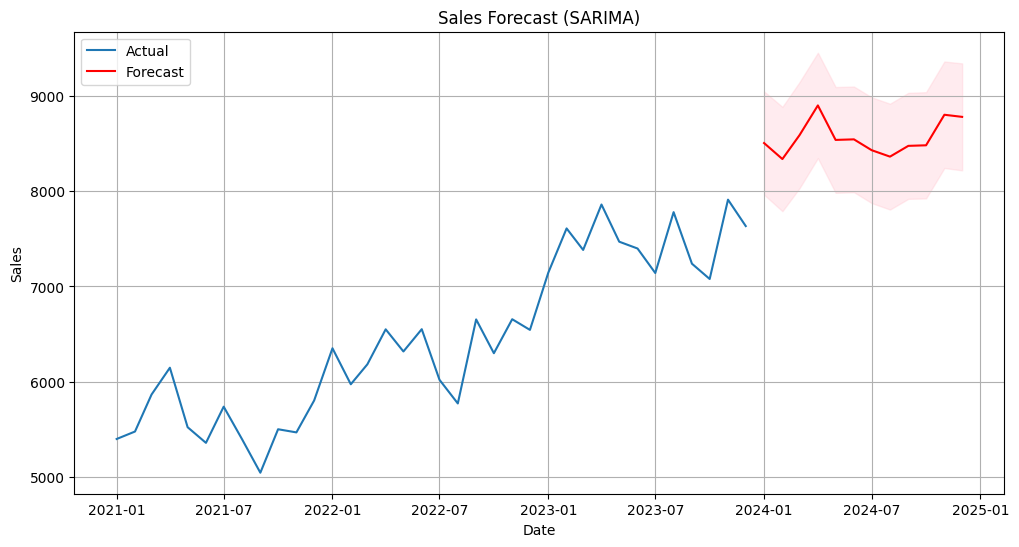

In [3]:
# Install statsmodels
!pip install statsmodels

# Import libraries
import statsmodels.api as sm

# Fit SARIMA model manually
model = sm.tsa.SARIMAX(df['Sales'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results = model.fit()

# Print summary
print(results.summary())

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean
forecast_df.index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')

# Plot
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Sales'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast')
plt.fill_between(forecast_df.index,
                 forecast_df['lower Sales'],
                 forecast_df['upper Sales'],
                 color='pink', alpha=0.3)
plt.title('Sales Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()
